clustering 

In [68]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [69]:
df = pd.read_excel("cars.xls")

In [70]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [71]:
df.nunique()

Price       798
Mileage     791
Make          6
Model        32
Trim         47
Type          5
Cylinder      3
Liter        16
Doors         2
Cruise        2
Sound         2
Leather       2
dtype: int64

In [72]:
x = df[["Price","Mileage","Cylinder"]]

In [73]:
x.head()

,Price,Mileage,Cylinder
0,17314.103129,8221,6
1,17542.036083,9135,6
2,16218.847862,13196,6
3,16336.913140,16342,6
4,16339.170324,19832,6


define fit predict

In [74]:
model = KMeans(n_clusters=4)

In [75]:
model = model.fit(x)

In [76]:
pred = model.predict(x)

In [77]:
pred

array([2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 1, 0,
       0, 1, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1,
       3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3,
       3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,

In [78]:
x["cluster"] = pred

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11744\3982395827.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["cluster"] = pred


In [79]:
x.head()

,Price,Mileage,Cylinder,cluster
0,17314.103129,8221,6,2
1,17542.036083,9135,6,2
2,16218.847862,13196,6,2
3,16336.913140,16342,6,2
4,16339.170324,19832,6,0


In [80]:
silhouette_score(x,pred)

0.41328609869496385

In [81]:
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model = KMeans(no_of_cluster=no_of_cluster)
        model = model.fit(x)
        pred = model.predict(x)
        score = silhouette_score(x,pred)
        print("Number of cluster {}, silhouette {}".format(no_of_cluster,score))


In [92]:
clust = x.assign(Cluster=model.labels_)
model.cluster_centers_.astype("int")
model.labels_

,Price,Mileage,Cylinder,cluster
336,13830.249025,17594,4,0
63,22661.048485,20105,6,0
272,11699.033916,19816,4,0
95,30792.149029,17870,6,1
384,23345.329069,22964,6,1
726,26698.078151,23055,4,1
271,13072.841631,14311,4,2
107,35338.653690,25163,8,1
395,16744.030253,21829,6,0
14,19774.249066,23359,6,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


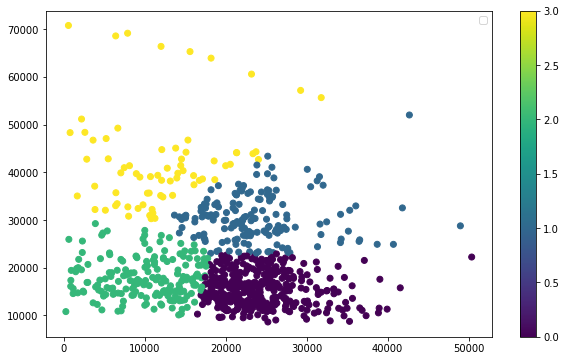

In [83]:
plt.figure(figsize=(10,6))
plt.scatter(x.Mileage, x.Price, c=pred)
plt.legend()
plt.colorbar()
plt.show()

In [84]:
allscores=[]
allclusters = []
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model = KMeans(n_clusters=no_of_cluster)
        #model = model.fit(x)
        pred = model.fit_predict(x)
        score = silhouette_score(x,pred)
        print("Number of cluster {}, silhouette {}".format(no_of_cluster,score))
        allscores.append(score)
        allclusters.append(no_of_cluster)

clust(10)

Number of cluster 2, silhouette 0.4511454168251408
Number of cluster 3, silhouette 0.41264497120383353
Number of cluster 4, silhouette 0.41328609869496385
Number of cluster 5, silhouette 0.35499063919168045
Number of cluster 6, silhouette 0.34325510755861427
Number of cluster 7, silhouette 0.3571375227822108
Number of cluster 8, silhouette 0.3682175117481624
Number of cluster 9, silhouette 0.3471976309689227
Number of cluster 10, silhouette 0.3579696931666516


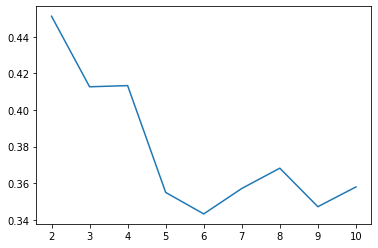

In [85]:
plt.plot(allclusters,allscores)

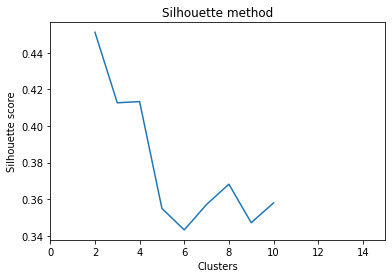

In [86]:
plt.plot(allclusters,allscores)
plt.xlabel("Clusters")
plt.ylabel("Silhouette score")
plt.title("Silhouette method")
plt.xlim(0,15)
plt.show()

In [87]:
allscores=[]
allclusters = []
sum_of_squared_distances = []
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model = KMeans(n_clusters=no_of_cluster)
        #model = model.fit(x)
        pred = model.fit_predict(x)
        sum_of_squared_distances.append(model.inertia_)
        score = silhouette_score(x,pred)
        print("Number of cluster {}, silhouette {}".format(no_of_cluster,score))
        allscores.append(score)
        allclusters.append(no_of_cluster)

clust(9)

Number of cluster 2, silhouette 0.4517011887710716
Number of cluster 3, silhouette 0.4132108681311706
Number of cluster 4, silhouette 0.41455890206754276
Number of cluster 5, silhouette 0.35465902893465207
Number of cluster 6, silhouette 0.3618691736125552
Number of cluster 7, silhouette 0.36205970043435265
Number of cluster 8, silhouette 0.3342982697157391
Number of cluster 9, silhouette 0.35002857301320495


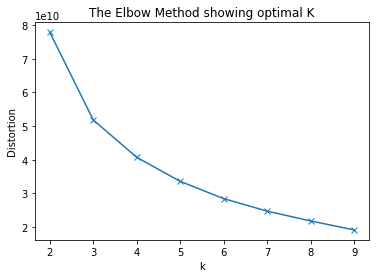

In [88]:
plt.plot(allclusters, sum_of_squared_distances,marker="x")
plt.xlabel("k")
plt.ylabel("Distortion")
plt.title("The Elbow Method showing optimal K")
plt.show()